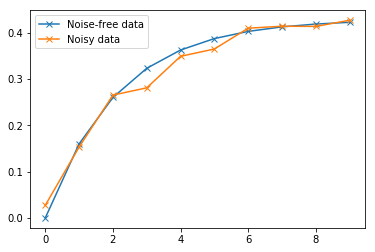

In [2]:
import pyabc
from study_abc_noise.model import ConversionReaction1dModelVars as ModelVars
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

mv = ModelVars(n_acc=10000, n_t=10)

model = mv.get_model()
model_noisy = mv.get_model_noisy()

if os.path.exists("data.dat"):
    data_nonoise, data_noise = pickle.load(open("data.dat", 'rb'))
else:
    data_nonoise = model(mv.p_true)
    data = model_noisy(mv.p_true)
    pickle.dump((data_nonoise, data), open("data.dat", 'wb'))

plt.plot(data_nonoise['y'], 'x-', label="Noise-free data")
plt.plot(data['y'], 'x-', label="Noisy data")
plt.legend()

prior = mv.get_prior()

In [3]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model, prior, distance, population_size=10000)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-22 10:56:46.077661, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 239.2893773244193
INFO:ABC:t: 0, eps: 239.2893773244193.
INFO:ABC:Acceptance rate: 10000 / 19699 = 5.0764e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 54.94733686335414.
INFO:ABC:Acceptance rate: 10000 / 20349 = 4.9142e-01, ESS=9.8581e+03.
INFO:ABC:t: 2, eps: 13.73573518116177.
INFO:ABC:Acceptance rate: 10000 / 19828 = 5.0434e-01, ESS=9.9955e+03.
INFO:ABC:t: 3, eps: 8.67529897675952.
INFO:ABC:Acceptance rate: 10000 / 19982 = 5.0045e-01, ESS=9.9999e+03.
INFO:ABC:t: 4, eps: 7.412222459900859.
INFO:ABC:Acceptance rate: 10000 / 19801 = 5.0502e-01, ESS=9.9972e+03.
INFO:ABC:t: 5, eps: 7.084582916454316.
INFO:ABC:Acceptance rate: 10000 / 19949 = 5.0128e-01, ESS=9.9926e+03.
INFO:ABC:t: 6, eps: 7.001226647458408.
INFO:ABC:Acceptance rate: 10000 / 19723 = 5.0702e-01, ESS=9.9963e+03.
INFO:ABC:t: 7, eps: 6.979946710467741.
INFO:ABC:Acceptance r

In [4]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=10000)
abc.new("sqlite:///h_noisymodel.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-22 10:59:14.431726, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 240.54317927107996
INFO:ABC:t: 0, eps: 240.54317927107996.
INFO:ABC:Acceptance rate: 10000 / 19982 = 5.0045e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 59.52885106343406.
INFO:ABC:Acceptance rate: 10000 / 20517 = 4.8740e-01, ESS=9.7992e+03.
INFO:ABC:t: 2, eps: 24.47845995660652.
INFO:ABC:Acceptance rate: 10000 / 20033 = 4.9918e-01, ESS=9.9178e+03.
INFO:ABC:t: 3, eps: 16.96719599180157.
INFO:ABC:Acceptance rate: 10000 / 26536 = 3.7685e-01, ESS=9.1359e+03.
INFO:ABC:t: 4, eps: 13.002879946718712.
INFO:ABC:Acceptance rate: 10000 / 46327 = 2.1586e-01, ESS=8.2928e+03.
INFO:ABC:t: 5, eps: 10.471501462399516.
INFO:ABC:Acceptance rate: 10000 / 85134 = 1.1746e-01, ESS=7.7487e+03.
INFO:ABC:t: 6, eps: 8.59968074162494.
INFO:ABC:Acceptance rate: 10000 / 156686 = 6.3822e-02, ESS=7.5947e+03.
INFO:ABC:t: 7, eps: 7.1986423773553625.
INFO:ABC:Accept

In [5]:
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

abc = pyabc.ABCSMC(model, prior, kernel,
                   eps=temperature, acceptor=acceptor,
                   population_size=10000)
abc.new("sqlite:///h_stochasticacceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-22 11:08:31.747571, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.6444e+01 for t=0.
INFO:ABC:t: 0, eps: 44.215066162891006.
INFO:ABC:Acceptance rate: 10000 / 33597 = 2.9765e-01, ESS=1.0000e+04.
DEBUG:Acceptor:pdf_norm=2.6444e+01 for t=1.
INFO:ABC:t: 1, eps: 2.5164955975768.
DEBUG:Acceptor:Encountered pd=2.6444e+01 > c=2.6444e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.6444e+01 > c=2.6444e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.6444e+01 > c=2.6444e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.6444e+01 > c=2.6444e+01, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 10000 / 33045 = 3.0262e-01, ESS=9.9144e+03.
DEBUG:Acceptor:pdf_norm=2.6444e+01 for t=2.
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Trans

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

In [6]:
def l1(x, y):
    return np.sum(np.abs(x['y'] - y['y']) / mv.noise_std)

abc = pyabc.ABCSMC(model, prior, l1, population_size=10000)
abc.new("sqlite:///h_incorrect_l1.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-22 11:11:14.670549, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 45.854019460170264
INFO:ABC:t: 0, eps: 45.854019460170264.
INFO:ABC:Acceptance rate: 10000 / 20039 = 4.9903e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 21.04979952649027.
INFO:ABC:Acceptance rate: 10000 / 20402 = 4.9015e-01, ESS=9.8310e+03.
INFO:ABC:t: 2, eps: 9.735920427066528.
INFO:ABC:Acceptance rate: 10000 / 19626 = 5.0953e-01, ESS=9.9988e+03.
INFO:ABC:t: 3, eps: 7.184822377503009.
INFO:ABC:Acceptance rate: 10000 / 19888 = 5.0282e-01, ESS=9.9987e+03.
INFO:ABC:t: 4, eps: 6.78259443013906.
INFO:ABC:Acceptance rate: 10000 / 20151 = 4.9625e-01, ESS=9.9953e+03.
INFO:ABC:t: 5, eps: 6.6835963611083695.
INFO:ABC:Acceptance rate: 10000 / 20260 = 4.9358e-01, ESS=9.9952e+03.
INFO:ABC:t: 6, eps: 6.634198653481347.
INFO:ABC:Acceptance rate: 10000 / 20171 = 4.9576e-01, ESS=9.9939e+03.
INFO:ABC:t: 7, eps: 6.609992997829632.
INFO:ABC:Acceptanc